<a href="https://colab.research.google.com/github/FreakingPotato/DL_playground/blob/master/DeepFlyBrain_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decode DeepFlyModel arch from kipoi

-- https://github.com/kipoi/models/tree/master/DeepFlyBrain

In [1]:
import os
from keras import backend as K
import keras
from keras.models import model_from_json

In [2]:
!wget https://zenodo.org/record/5153337/files/DeepFlyBrain.json

--2022-03-03 11:50:20--  https://zenodo.org/record/5153337/files/DeepFlyBrain.json
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6502 (6.3K) [text/plain]
Saving to: ‘DeepFlyBrain.json.2’

DeepFlyBrain.json.2 100%[===================>]   6.35K  --.-KB/s    in 0s      

2022-03-03 11:50:21 (835 MB/s) - ‘DeepFlyBrain.json.2’ saved [6502/6502]



In [8]:
!wget https://zenodo.org/record/5153337/files/DeepFlyBrain.hdf5

--2022-03-03 11:53:16--  https://zenodo.org/record/5153337/files/DeepFlyBrain.hdf5
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12921600 (12M) [application/octet-stream]
Saving to: ‘DeepFlyBrain.hdf5’

DeepFlyBrain.hdf5   100%[===================>]  12.32M  2.40MB/s    in 7.3s    

2022-03-03 11:53:25 (1.70 MB/s) - ‘DeepFlyBrain.hdf5’ saved [12921600/12921600]



In [6]:
json_file = open('DeepFlyBrain.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

# it is importent to load the custom_objects K 
# https://github.com/keras-team/keras/issues/4609
model = model_from_json(loaded_model_json, custom_objects={"K": K})
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500, 4)]     0           []                               
                                                                                                  
 lambda_2 (Lambda)              (None, 500, 4)       0           ['input_1[0][0]']                
                                                                                                  
 lambda_1 (Lambda)              (None, 500, 4)       0           ['lambda_2[0][0]']               
                                                                                                  
 conv1d_1 (Conv1D)              (None, 500, 1024)    99328       ['input_1[0][0]',                
                                                                  'lambda_1[0][0]']         

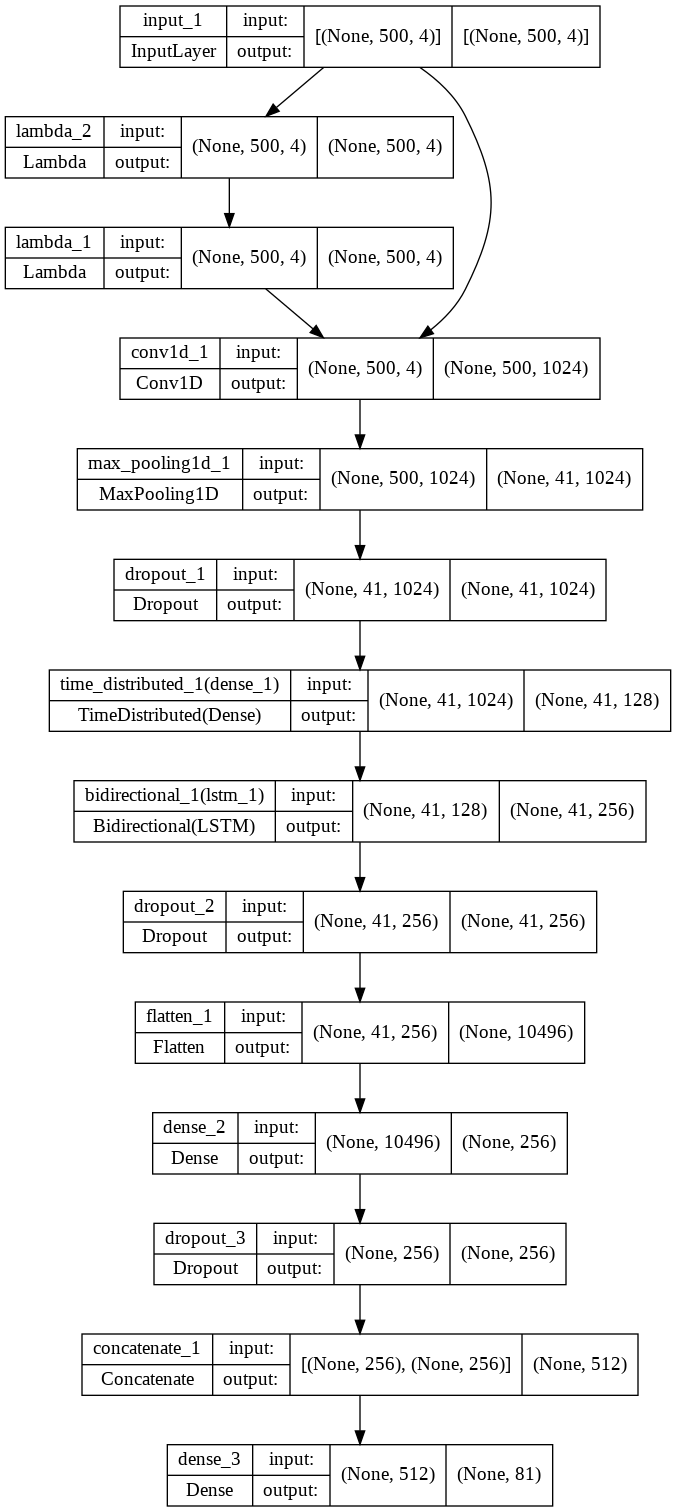

In [10]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [9]:
model.load_weights('/content/DeepFlyBrain.hdf5')

In [ ]:
#maybe test on some fake input